Task: Employee Retention analysis

Model: Logistic Regression

Data: https://www.kaggle.com/giripujar/hr-analytics

In [41]:
# import modules and libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 



In [2]:
# Fetch dataset

path = '/content/drive/MyDrive/Colab Notebooks/Machine learning/dataset/HR_comma_sep.csv'
df = pd.read_csv(path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Analyzing the data

In [9]:
# dataset size and shape
df.shape

(14999, 10)

In [10]:
# Number of employees who left and who stayed

df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [12]:
# additional dataframe for employees who left
df_left = df[df['left'] == 1]
df_left.shape

(3571, 10)

In [13]:
# additional dataframe for employees who stayed
df_stayed = df[df['left'] !=1]
df_stayed.shape

(11428, 10)

In [40]:
# Comparing attributes for those who left and who stayed to find importance on attrition
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


The important fetaures contributing on attrition are:-
- satisfaction level as its below .5 (say the threshold is .5)
- avg monthly hours for people who left are also higher than who stayed.
- Those who left also have lesser promotion
- They also spend more time in the company so may be they opted to switch.
- Salary also played important role (found from below plots)

**Plotting charts to show impact of employee salaries on retention**

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317


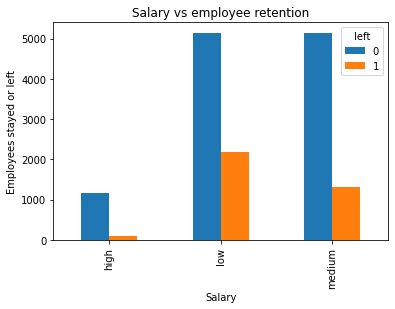

In [37]:
ct_sal = pd.crosstab(df['salary'],df['left'])
print(ct_sal)
ax1 = ct_sal.plot(kind='bar')
ax1.set_xlabel('Salary')
ax1.set_ylabel('Employees stayed or left')
ax1.set_title('Salary vs employee retention')
plt.show()

The above plot shows employees with low salary has the highest retention rate and employees with high salary stay the most.

**Plotting charts to show the corelation between department and employee retention**

left            0     1
Department             
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697


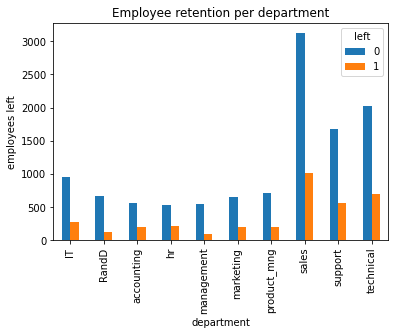

In [38]:
ct_dept = pd.crosstab(df['Department'],df['left'])
print(ct_dept)
ax = ct_dept.plot(kind='bar')
ax.set_xlabel('department')
ax.set_ylabel('employees left')
ax.set_title('Employee retention per department')
plt.show()

The above plot shows Sales has the highest attrition followed by techincal and support.  Where in Management department employees stay the most.

**Model Building**

In [42]:
# check datatypes of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# select attributes contributing on attrition

X = df[['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years','salary','Department']]
X.head()

In [ ]:
# converting non-integer attributes to numbers
one_hot_dep = pd.get_dummies(X, columns = ['Department'])
one_hot_dep.head(2)

In [ ]:
# converting non-integer attributes to numbers
one_hot_sal = pd.get_dummies(one_hot_dep, columns = ['salary'])
one_hot_sal.head()

In [86]:
x = one_hot_sal
y = df['left']

In [81]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
# fitting the model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [87]:
# predict on test set
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [85]:
# accuracy on test set
score = model.score(X_test,y_test)
score

0.7556666666666667